<a href="https://colab.research.google.com/github/mohanamudha/plant-diseases/blob/main/tomato_leaf_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

**Importing the Dataset**

In [4]:

# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = '../content/drive/MyDrive/Work/Dataset/train'
valid_path = '../content/drive/MyDrive/Work/Dataset/validation'

**Inception V3**

In [5]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87924736/87910968 [==============================] - 0s 0us/step


In [6]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# Folders in the Training Set
folders = glob('../content/drive/MyDrive/Work/Dataset/train*')
folders

['../content/drive/MyDrive/Work/Dataset/train']

In [17]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(10, activation='softmax')(x)

In [18]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)
# model = Model(inputs=vgg.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [30]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='sgd',
  metrics=['accuracy']
)

In [31]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
# Training Generator
training_set = train_datagen.flow_from_directory('../content/drive/MyDrive/Work/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10020 images belonging to 10 classes.


In [ ]:
# Testing Generator
test_set = test_datagen.flow_from_directory('../content/drive/MyDrive/Work/Dataset/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [33]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
314/314 [==============================] - 194s 516ms/step - loss: 1.3593 - accuracy: 0.8711 - val_loss: 0.5916 - val_accuracy: 0.9225
Epoch 2/5
314/314 [==============================] - 160s 509ms/step - loss: 1.2003 - accuracy: 0.8877 - val_loss: 0.5973 - val_accuracy: 0.9225
Epoch 3/5
314/314 [==============================] - 157s 500ms/step - loss: 0.9339 - accuracy: 0.8985 - val_loss: 0.9003 - val_accuracy: 0.8922
Epoch 4/5
314/314 [==============================] - 158s 503ms/step - loss: 1.0893 - accuracy: 0.8885 - val_loss: 0.7628 - val_accuracy: 0.9102
Epoch 5/5
314/314 [==============================] - 158s 503ms/step - loss: 0.8416 - accuracy: 0.9043 - val_loss: 0.6018 - val_accuracy: 0.9206


**Visualize the model training by plotting Loss Function and Accuracy**

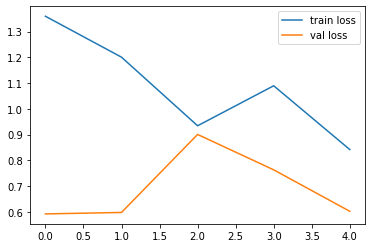

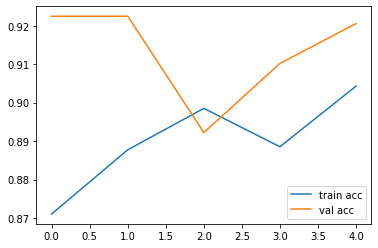

<Figure size 432x288 with 0 Axes>

In [34]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [35]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [36]:
y_pred = model.predict(test_set)
y_pred

array([[1.9032315e-05, 1.2227597e-03, 5.1628694e-14, ..., 9.9875820e-01,
        3.5384011e-26, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.8297836e-04, 4.1382184e-12, 2.1101002e-22, ..., 1.0071234e-18,
        1.3943589e-14, 0.0000000e+00],
       ...,
       [1.3910969e-17, 3.1115644e-05, 9.9996591e-01, ..., 2.6478938e-19,
        4.8391089e-27, 6.1316727e-18],
       [1.0000000e+00, 4.9267684e-10, 4.9228760e-19, ..., 2.5610589e-25,
        4.7678936e-23, 1.8183826e-20],
       [2.6872025e-12, 4.7212976e-09, 6.9365300e-09, ..., 5.9888899e-11,
        1.0604967e-11, 8.0100255e-09]], dtype=float32)

In [37]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 7, 3, ..., 2, 0, 5])